<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220704_Billionaires_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/06/24/billionaires-analysis-with-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Billionaire.csv')

In [3]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [6]:
data.isnull().sum() / data.count()

Name        0.000000
NetWorth    0.000000
Country     0.000000
Source      0.000000
Rank        0.000000
Age         0.029522
Industry    0.000000
dtype: float64

In [7]:
data = data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2676 non-null   object 
 1   NetWorth  2676 non-null   object 
 2   Country   2676 non-null   object 
 3   Source    2676 non-null   object 
 4   Rank      2676 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2676 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 167.2+ KB


In [9]:
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [10]:
for i in data.columns:
  print(i)
  print(data[str(i)].unique())
  print('****************'*5)

Name
['Jeff Bezos' 'Elon Musk' 'Bernard Arnault & family' ... 'Zhao Meiguang'
 'Zhong Naixiong' 'Zhou Wei family']
********************************************************************************
NetWorth
['$177 B' '$151 B' '$150 B' '$124 B' '$97 B' '$96 B' '$93 B' '$91.5 B'
 '$89 B' '$84.5 B' '$77 B' '$73.6 B' '$68.9 B' '$68.7 B' '$65.8 B'
 '$62.8 B' '$61.8 B' '$60.2 B' '$59.5 B' '$59 B' '$55.3 B' '$53 B'
 '$51.9 B' '$50.5 B' '$49.9 B' '$48.4 B' '$46.4 B' '$45.4 B' '$45.1 B'
 '$44.1 B' '$42.3 B' '$41.8 B' '$39.2 B' '$39 B' '$38.2 B' '$37.7 B'
 '$36.9 B' '$35.6 B' '$35.1 B' '$34.5 B' '$33.7 B' '$33.5 B' '$33 B'
 '$32 B' '$31.7 B' '$31.3 B' '$29.6 B' '$29.1 B' '$28.4 B' '$27.7 B'
 '$27 B' '$26.9 B' '$26.4 B' '$26.3 B' '$26.2 B' '$26.1 B' '$25.9 B'
 '$25.8 B' '$25.5 B' '$25 B' '$24.9 B' '$24.6 B' '$24.4 B' '$23.6 B'
 '$23.5 B' '$23.4 B' '$23.3 B' '$23 B' '$22.4 B' '$22 B' '$21.9 B'
 '$21.7 B' '$21.6 B' '$21.5 B' '$21.4 B' '$21.3 B' '$20.9 B' '$20.5 B'
 '$20.4 B' '$20.3 B' '$19.7 B' '$19.

In [11]:
data2 = data.copy()

In [12]:
import re

In [13]:
data2['NetWorth_clean'] = data2['NetWorth'].str.strip('$')
data2['NetWorth_clean'] = data2['NetWorth_clean'].str.strip('B')
data2['NetWorth_clean'] = data2['NetWorth_clean'].astype('float')

In [14]:
data2.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry,NetWorth_clean
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,177.0
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,151.0
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,150.0
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,124.0
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,97.0


In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 0 to 2754
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            2676 non-null   object 
 1   NetWorth        2676 non-null   object 
 2   Country         2676 non-null   object 
 3   Source          2676 non-null   object 
 4   Rank            2676 non-null   int64  
 5   Age             2676 non-null   float64
 6   Industry        2676 non-null   object 
 7   NetWorth_clean  2676 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 188.2+ KB


In [23]:
df = data2.sort_values(by=['NetWorth_clean'], ascending=False).head(10)
df

,Name,NetWorth,Country,Source,Rank,Age,Industry,NetWorth_clean
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,177.0
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,151.0
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,150.0
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,124.0
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,97.0
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments,96.0
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology,93.0
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology,91.5
8,Sergey Brin,$89 B,United States,Google,9,47.0,Technology,89.0
9,Mukesh Ambani,$84.5 B,India,diversified,10,63.0,Diversified,84.5


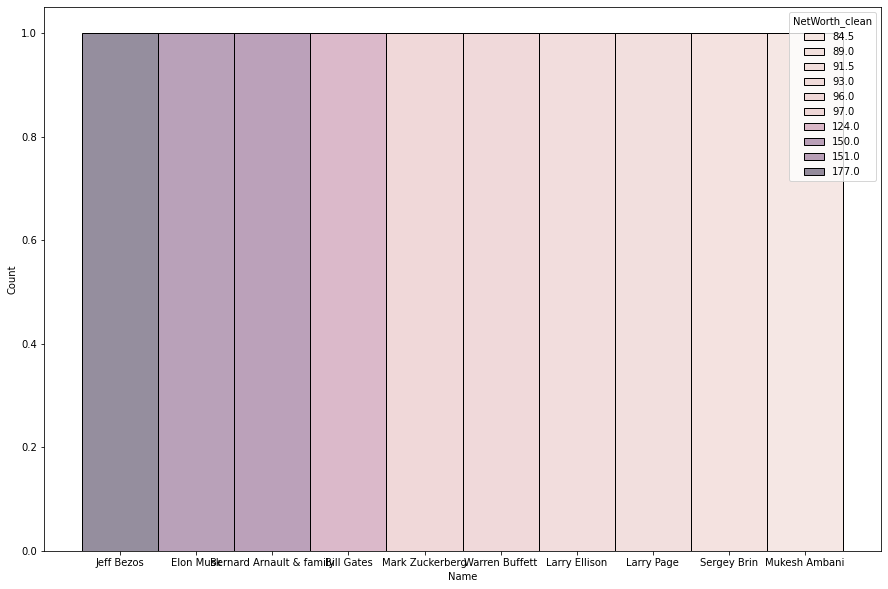

In [25]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x='Name', hue='NetWorth_clean')
plt.show()

In [26]:
data = data2.copy()

In [27]:
a = data['Source'].value_counts().head()
a

real estate        169
pharmaceuticals     96
investments         89
diversified         78
software            61
Name: Source, dtype: int64

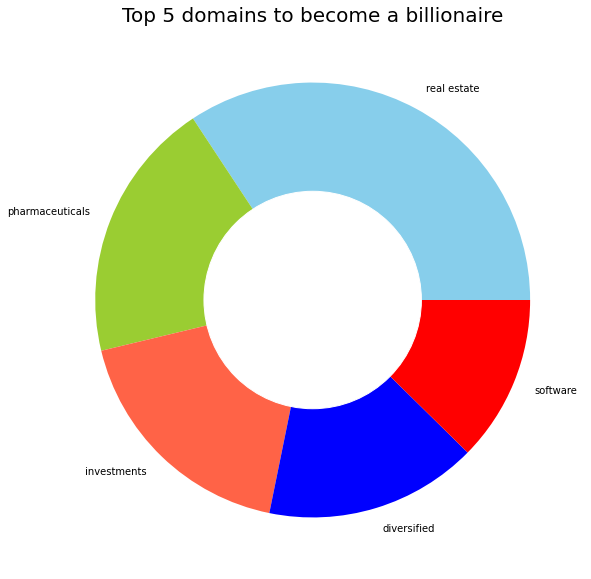

In [29]:
sources = a.values
index = a.index
custom_colors = ['skyblue', 'yellowgreen', 'tomato', 'blue', 'red']
plt.figure(figsize=(15,10))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0,0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('Top 5 domains to become a billionaire', fontsize=20)
plt.show()

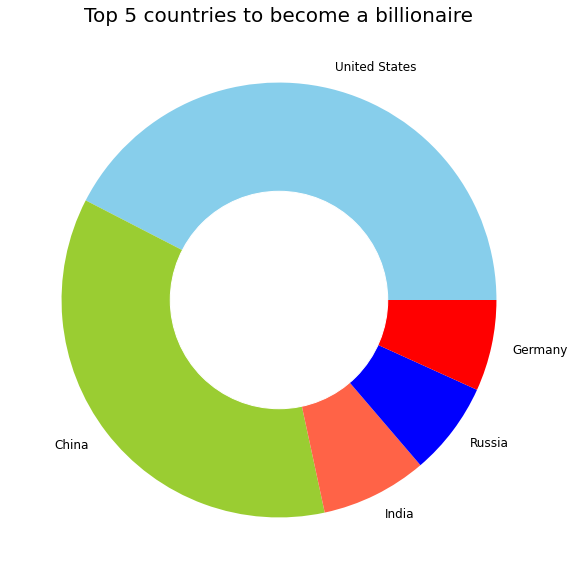

In [30]:
a = data['Country'].value_counts().head()
sources = a.values
index = a.index
custom_colors = ['skyblue', 'yellowgreen', 'tomato', 'blue', 'red']
plt.figure(figsize=(15,10))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0,0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('Top 5 countries to become a billionaire', fontsize=20)
plt.show()

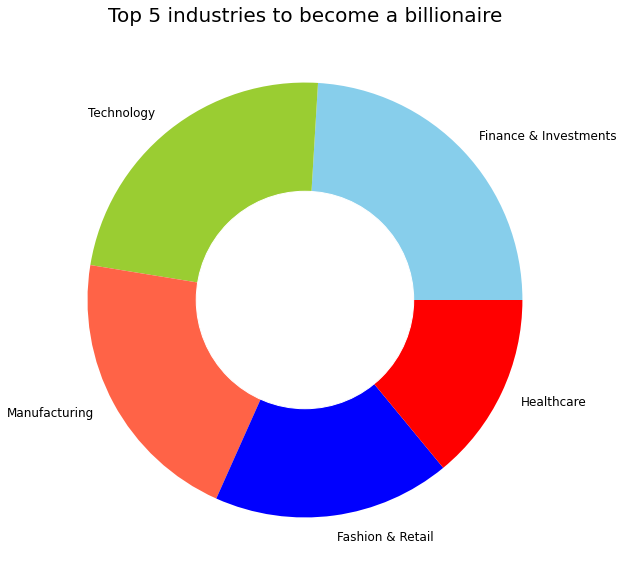

In [31]:
a = data['Industry'].value_counts().head()
sources = a.values
index = a.index
custom_colors = ['skyblue', 'yellowgreen', 'tomato', 'blue', 'red']
plt.figure(figsize=(15,10))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0,0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('Top 5 industries to become a billionaire', fontsize=20)
plt.show()